In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
copd_audio = "COPD1.wav"
asthma_audio = "1gimjLEgqBdoHReixdq8HlEBfEr20.wav"

copd, sr = librosa.load(copd_audio, duration = 2.99)
asthma, _ = librosa.load(asthma_audio, duration = 2.99)

In [ ]:
sample_duration = 1/sr

In [ ]:
#duration of the audio signal in seconds
duration_copd = sample_duration * len(copd)
duration_asthma = sample_duration * len(asthma)

<function matplotlib.pyplot.show(close=None, block=None)>

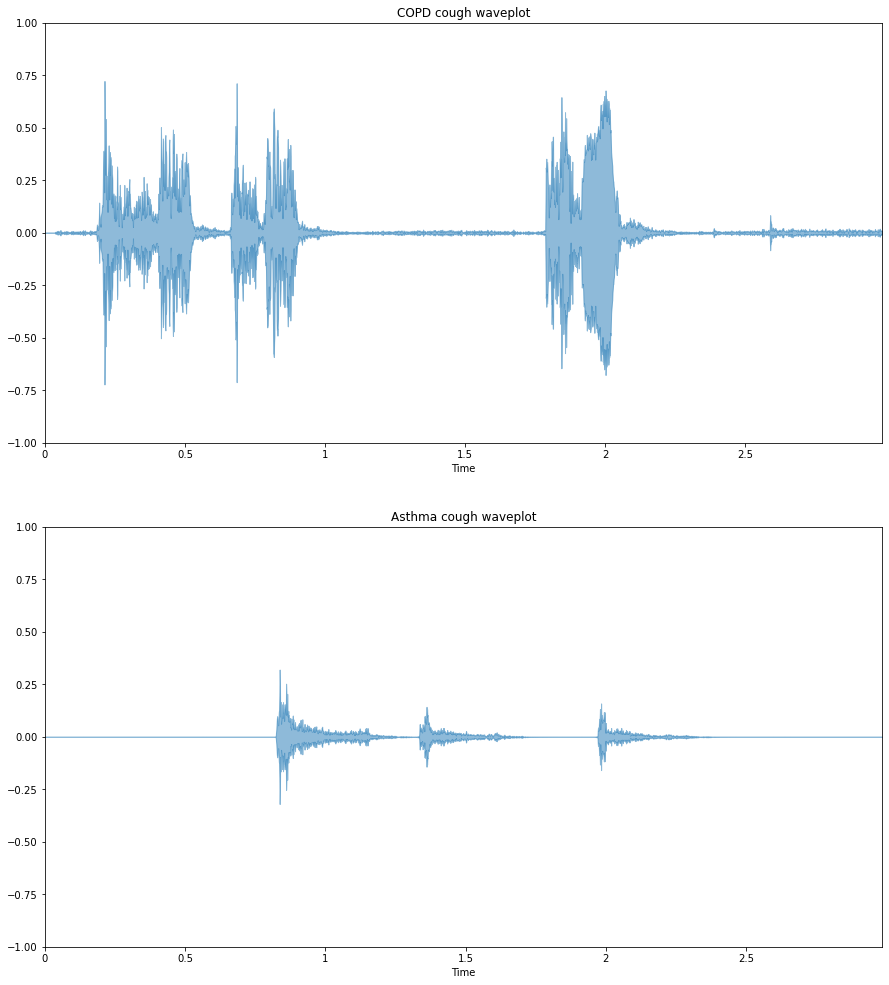

In [79]:
plt.figure(figsize=(15,17))

plt.subplot(2,1,1)
librosa.display.waveplot(copd, alpha = 0.5)
plt.title("COPD cough waveplot")
plt.ylim(-1, 1)

plt.subplot(2,1,2)
librosa.display.waveplot(asthma, alpha = 0.5)
plt.title("Asthma cough waveplot")
plt.ylim(-1, 1)
plt.show

In [3]:
#calculate the ampitude envelope
#find the max amplitude value per frame in the signal, then stack all those values to get the amplitude envelope

FRAME_SIZE = 400
HOP_LENGTH = 210

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    #calculate the amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [4]:
ae_copd = amplitude_envelope(copd, FRAME_SIZE, HOP_LENGTH)
print (len(ae_copd))

ae_asthma = amplitude_envelope(asthma, FRAME_SIZE, HOP_LENGTH)
print (len(ae_asthma))

314
314


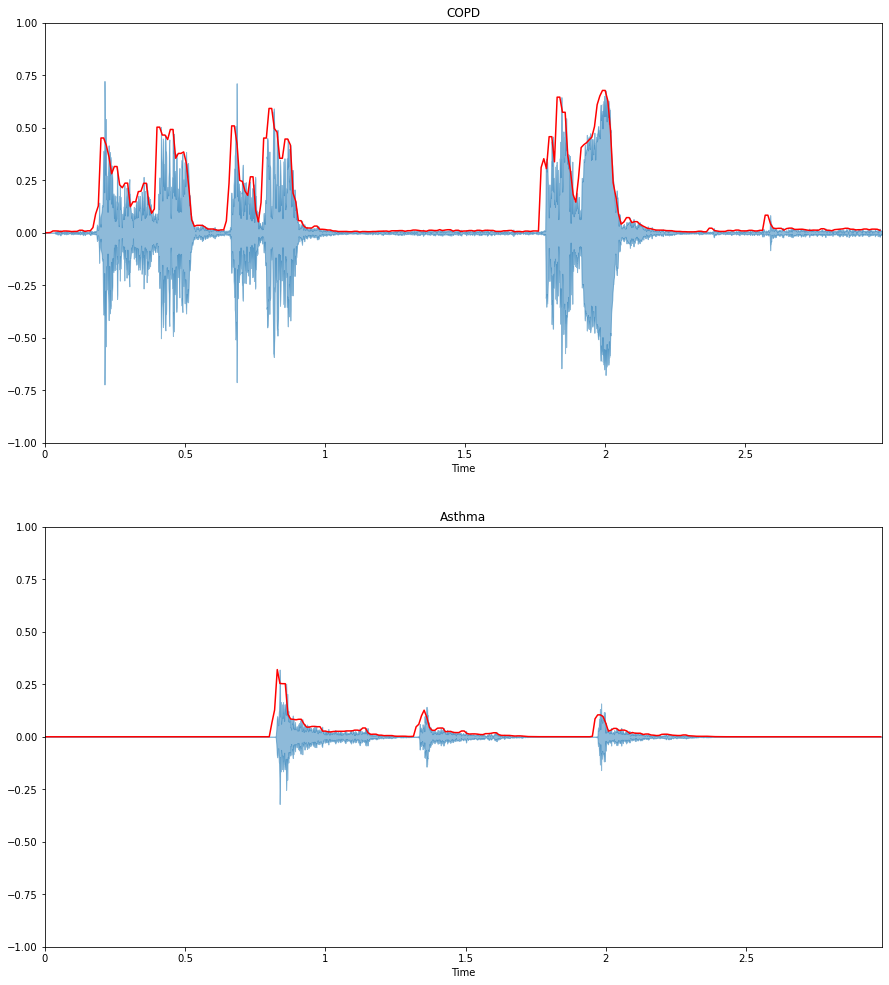

In [75]:
#visualize the amplitude envelope for all the audio files
frames1 = range(len(ae_copd))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)

frames2 = range(len(ae_asthma))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

ax = plt.subplot(2, 1, 1)
librosa.display.waveplot(copd, alpha=0.5)
plt.plot(t1, ae_copd, color="r")
plt.ylim((-1, 1))
plt.title("COPD")

plt.subplot(2, 1, 2)
librosa.display.waveplot(asthma, alpha=0.5)
plt.plot(t2, ae_asthma, color="r")
plt.ylim((-1, 1))
plt.title("Asthma")

plt.show()

In [70]:
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt

In [97]:
peaks, _ = find_peaks(copd, prominence=0.5)
np.diff(peaks)

array([  104,   172,   120,   151,   527,  3322,   120,    32,    29,
         105,    31,    58,    89,    28,    29,   208,    62,   274,
          30,    35,    68,    35,   115,   225,   172,    29,    32,
          69,   113,    77,    38,    33,    40,    38,    35,    38,
        3598,    57,    65,    94,  2317,    31,    32,    31,    32,
          28,    28,    58,    31,    27,   211,    28,    31,    34,
          28,    31,   111,    54,    30,    30,    28,    30,   142,
          28,   256,    58,    26,   177,    32,    33,    31,    70,
          72,    30,   177, 19932,    30,    29,    28,    28,    30,
         313,    96,   211,    91,    76,   162,    47,    44,    43,
          97,    45,    48,    46,    43,    47,    46,    46,    48,
          45,    47,   104,   108,   891,    81,    39,    42,    38,
          39,    42,    39,    38,    38,    40,    40,    39,    40,
          40,    39,    40,    40,    39,    40,    39,    40,    38,
          40,    40,

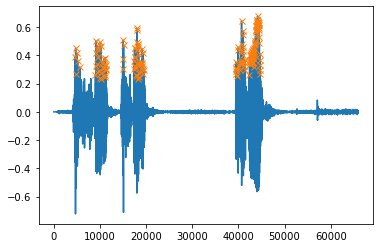

In [100]:
plt.plot(copd)
plt.plot(peaks, copd[peaks], "x")
plt.show()

[(21, 0.450976), (37, 0.23537788), (42, 0.5025448), (70, 0.5085426), (77, 0.2662109), (84, 0.59167176), (90, 0.44597554), (189, 0.4571855), (192, 0.6453948), (209, 0.6774045), (270, 0.083408)]


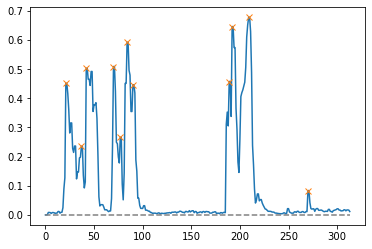

In [76]:
x = ae_copd
peaks, _ = find_peaks(x, prominence=0.05)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
print( [(i,j) for i, j in zip(peaks, x[peaks] )] )  # To print x and corresponding peak at x
plt.show()

In [101]:
copd[peaks[0]]

0.39061776

In [110]:
list(y).index(copd[peaks[0]])

4622

In [111]:
ms_left = 2000
ms_right = 2000
time_step_in_sec = 0.000045
y = copd
index_val = list(y).index(copd[peaks[0]])

trimmed_signal = y[(index_val - round((ms_left/1000)/time_step_in_sec)):(index_val + round((ms_right/1000)/time_step_in_sec))]

In [103]:
trimmed_signal

array([-1.3034804e-03, -8.2041457e-04, -9.0836591e-05, ...,
       -2.9331238e-03, -2.9646005e-03, -3.0702476e-03], dtype=float32)

(-1.0, 1.0)

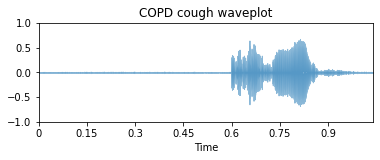

In [112]:
plt.subplot(2,1,1)
librosa.display.waveplot(trimmed_signal, alpha = 0.5)
plt.title("COPD cough waveplot")
plt.ylim(-1, 1)

(-1.0, 1.0)

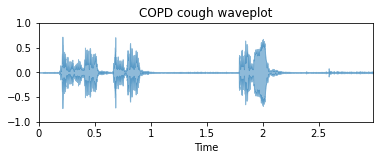

In [109]:
plt.subplot(2,1,1)
librosa.display.waveplot(copd, alpha = 0.5)
plt.title("COPD cough waveplot")
plt.ylim(-1, 1)